<a href="https://colab.research.google.com/github/ArshiAbolghasemi/AI-UT/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will utilize a text dataset to demonstrate advanced natural language processing techniques. Our approach will involve initial preprocessing of the text, followed by the application of Word2Vec and neural networks to effectively analyze and interpret the data. Through these methods, we aim to uncover meaningful patterns and insights within the text.

# Imports and Settings

## Imports

In [25]:
!pip install emoji

import os
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from emoji import demojize

## Settings

In [8]:
DRIVE_MOUNTED_PATH=os.path.join(os.getcwd(), 'drive/')
TWITTER_SUICIDAL_DATASET_PATH=os.path.join(DRIVE_MOUNTED_PATH, 'MyDrive/AI-UT/neural_network/twitter-suicidal-data.csv')

## Mounting to Google Drive

In [ ]:
drive.mount(DRIVE_MOUNTED_PATH)

Mounted at /content/drive/


# Data Preprocessing

## Reading Dataset

In [11]:
twitter_suicidal_data = pd.read_csv(TWITTER_SUICIDAL_DATASET_PATH)

In [12]:
twitter_suicidal_data

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [30]:
twitter_suicidal_data_cleaned = twitter_suicidal_data.copy()

## Convert to lowercase

Converting all text to lowercase ensures uniformity. It helps in matching words correctly regardless of their case, reducing redundancy (e.g., "Python" and "python" are considered the same word).
<br>
Pros:
- **Normalization**: Converting text to lowercase helps normalize the text by ensuring consistency. It treats words with different cases (e.g., "Hello", "hello", "HELLO") as the same, which can simplify text processing and analysis.

- **Reduced Vocabulary Size**: Lowercasing reduces the number of distinct tokens in the text, which can improve the efficiency of downstream tasks such as tokenization, indexing, and modeling. This is particularly beneficial for tasks with limited computational resources.

- **Improved Matching**: Lowercasing facilitates case-insensitive matching. This is useful in tasks such as search, comparison, and retrieval, where case sensitivity might not be desired or necessary.

- **Standardization**: Lowercasing helps standardize text data, making it consistent across different sources, systems, and languages. It ensures that text processing pipelines produce consistent results regardless of the original casing.

Cons:
- **Loss of Information**: Lowercasing can lead to the loss of information, especially in cases where the distinction between uppercase and lowercase letters is semantically meaningful. For example, proper nouns, acronyms, and emphasis can be lost when converted to lowercase.

- **Misinterpretation of Entities**: Lowercasing can potentially alter the interpretation of named entities (e.g., "USA" to "usa"), leading to ambiguity or misinterpretation in text analysis tasks, such as named entity recognition or entity disambiguation.

- **Loss of Emphasis**: Lowercasing removes emphasis conveyed by uppercase letters, which might be important for conveying tone, emphasis, or significance in the text. This can affect tasks such as sentiment analysis or text summarization.

## Remove Punctuation

Punctuation marks are generally not useful in most text analysis tasks (e.g., sentiment analysis) and can be removed to focus on the words themselves. This step simplifies tokenization and text processing.

## Removing Numbers

Numbers in text data, especially from social media, can be noisy and might not contribute meaningfully to the analysis. For example, random numbers, dates, and phone numbers often do not hold significant value in text sentiment analysis or other NLP tasks.
<br>
Pros:
- **Improved Text Clarity**: Removing numbers can make the text clearer and more readable, especially in tasks like sentiment analysis, topic modeling, or text summarization, where numbers might not contribute to the overall meaning.

- **Reduced Vocabulary Size**: By eliminating numbers, you reduce the size of the vocabulary, which can simplify text processing tasks such as tokenization, indexing, and modeling. This can lead to more efficient algorithms and reduced computational overhead.

- **Focused Analysis**: In some cases, numbers are noise that distracts from the main content of the text. By removing them, you can focus your analysis on the relevant textual information, leading to more accurate results.

Cons:
- **Loss of Information**: Removing numbers may result in the loss of valuable information, especially in contexts where numerical data is significant, such as financial reports, scientific documents, or technical manuals. The presence of numbers can convey quantitative information, dates, measurements, or other important details.

- **Altered Meaning**: In certain text analysis tasks, such as sentiment analysis or opinion mining, numbers may carry emotional or contextual significance. Removing them could potentially alter the meaning or sentiment of the text, leading to misinterpretation.

- **Impact on Tasks**: Removing numbers may not be suitable for all tasks or datasets. In some cases, such as text classification based on numerical patterns or sentiment analysis of numerical reviews, preserving numbers might be essential for accurate analysis.

## Remove URLs

URLs are often not useful for text analysis and can introduce noise. They usually don't contribute to the sentiment or meaning of the tweet and can be safely removed to focus on the actual content.

## Remove Mentions

Mentions (e.g., @elonmusk) are specific to Twitter and do not usually contribute to the semantic content of the text. Removing them helps in focusing on the message rather than the addressed users.

## Remove Emojis

Emojis can convey sentiment and meaning, but they might complicate text processing. If the analysis does not benefit from emojis, removing them can simplify the text. However, if you are interested in the sentiment or emotional content, you might want to keep them or replace them with corresponding text descriptions.

## Space Uniformity


Ensuring uniformity of spaces is an important step in text preprocessing. It involves removing extra spaces, leading and trailing spaces, and ensuring that words are properly separated by a single space. This helps in maintaining consistency and avoiding potential issues in tokenization or further analysis.

## Tokenize

Tokenization splits the text into individual words (tokens). This is a crucial step for many text processing tasks like filtering out stopwords, analyzing word frequencies, and further text analysis.



## Remove Stopwords

Stopwords (e.g., "and", "is", "in") are common words that usually do not carry significant meaning and can be removed to focus on the more meaningful words. This reduces the dimensionality of the data and improves analysis efficiency.

## Remove Hashtags

Preserving hashtags in suicidal tweets can provide valuable contextual information and improve model accuracy in certain cases, but it also carries risks of introducing noise, overfitting, and ethical concerns. The impact on model accuracy depends on various factors, including the quality of the data, the task at hand, and the design of the model. Therefore, it's crucial to carefully evaluate the trade-offs and implications of preserving hashtags in suicidal tweets and to adopt appropriate strategies for mitigating potential risks while maximizing the benefits of contextual information.

## Implementation

In [16]:
# Download Stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
def preprocess_tweet(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = re.sub(r'\d+', '', tweet)
  tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
  tweet = re.sub(r'@\w+', '', tweet)
  tweet = demojize(tweet)
  tweet = re.sub(r'\s+', ' ', tweet).strip()
  return tweet

In [29]:
def tokenize_cleaned_tweet(cleaned_tweet):
  tokens = word_tokenize(cleaned_tweet)
  tokens = [word for word in tokens if word not in stopwords.words('english')]
  return tokens

In [31]:
twitter_suicidal_data_cleaned['cleaned_tweet'] = twitter_suicidal_data_cleaned['tweet'].apply(preprocess_tweet)

In [37]:
sample_tweet = twitter_suicidal_data_cleaned.sample(n=5)

In [38]:
sample_tweet['tweet'].head()

4671    headed in to the valley today grampy has pneum...
8424    i mean if i was gonna kill myself i d look up ...
221     is there a point to life i ve always felt so o...
8305    how do i know if this positivity and ambition ...
2249    another whiny straight white man hey redditi f...
Name: tweet, dtype: object

In [39]:
sample_tweet['cleaned_tweet'].tail()

4671    headed in to the valley today grampy has pneum...
8424    i mean if i was gonna kill myself i d look up ...
221     is there a point to life i ve always felt so o...
8305    how do i know if this positivity and ambition ...
2249    another whiny straight white man hey redditi f...
Name: cleaned_tweet, dtype: object

In [41]:
twitter_suicidal_data_cleaned['tokens'] = twitter_suicidal_data_cleaned['cleaned_tweet'].apply(tokenize_cleaned_tweet)

## Describe Result

In [43]:
twitter_suicidal_data_cleaned.head()

,tweet,intention,cleaned_tweet,tokens
0,my life is meaningless i just want to end my l...,1,my life is meaningless i just want to end my l...,"[life, meaningless, want, end, life, badly, li..."
1,muttering i wanna die to myself daily for a fe...,1,muttering i wanna die to myself daily for a fe...,"[muttering, wan, na, die, daily, months, feel,..."
2,work slave i really feel like my only purpose ...,1,work slave i really feel like my only purpose ...,"[work, slave, really, feel, like, purpose, lif..."
3,i did something on the 2 of october i overdose...,1,i did something on the of october i overdosed ...,"[something, october, overdosed, felt, alone, h..."
4,i feel like no one cares i just want to die ma...,1,i feel like no one cares i just want to die ma...,"[feel, like, one, cares, want, die, maybe, fee..."


In [44]:
twitter_suicidal_data_cleaned['token_count'] = twitter_suicidal_data_cleaned['tokens'].apply(len)

In [46]:
result = twitter_suicidal_data_cleaned.groupby('intention')['token_count'].agg(['mean', 'max', 'min'])
print(result)

                mean   max  min
intention                      
0           8.976567    38    0
1          73.848424  2147    1


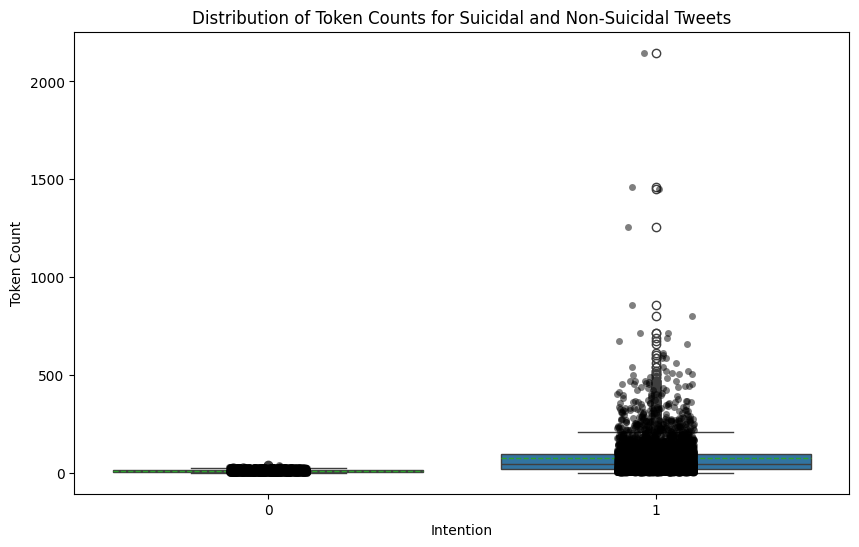

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=twitter_suicidal_data_cleaned, x='intention', y='token_count', showmeans=True, meanline=True)
sns.stripplot(data=twitter_suicidal_data_cleaned, x='intention', y='token_count', jitter=True, color='black', alpha=0.5)
plt.title('Distribution of Token Counts for Suicidal and Non-Suicidal Tweets')
plt.xlabel('Intention')
plt.ylabel('Token Count')
plt.show()